# Detecting Fake News with Python and Machine Learning - Basic Model

In [1]:
# Imorting Basic Dependencis
import numpy as np
import pandas as pd 
import itertools 

Uploading Data

In [2]:
df_rawdata = pd.read_csv(r'C:\Users\nkhg\Desktop\AIML\30 Projects\DAY5\rawnews.csv')
print(df_rawdata.shape)
df_rawdata.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df_rawdata.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df_rawdata.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Train Data sets contains 3 columns
1. title : Title of the news
2. text : content of the article 
3. label : has decisions FAKE or REAL

RAW DATA set Information

In [5]:
df_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


# Data processing & cleaning

# DATA processing for title columnm

In [6]:
# creating a dictionary with Apostrophe
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

# short words dictonary 

short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

# Emotican Dictonary 

emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}


In [7]:
from html.parser import HTMLParser
html_parser =  HTMLParser()
# creating a new column and appending the cleaned version 
df_rawdata['clean title'] = df_rawdata['title'].apply(lambda x: html_parser.unescape(x))

import re
# Funtion remove_pattern to remove the @user tags
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# Function Call to remove twitter handles (@user)

df_rawdata['clean title'] = np.vectorize(remove_pattern)(df_rawdata['clean title'], "@[\w]*")

# chaning the deta into lower case
df_rawdata['clean title'] = df_rawdata['clean title'].apply(lambda x: x.lower())
#Function (lookup_dict) to remove dictonary items
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

df_rawdata['clean title'] = df_rawdata['clean title'].apply(lambda x: lookup_dict(x,apostrophe_dict))

# short word look up
df_rawdata['clean title'] = df_rawdata['clean title'].apply(lambda x: lookup_dict(x,short_word_dict))

# emoticon lookup
df_rawdata['clean title'] = df_rawdata['clean title'].apply(lambda x: lookup_dict(x,emoticon_dict))

# Replacing Punctuations with space
df_rawdata['clean title'] = df_rawdata['clean title'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))

# Replacing Special Characters with space
df_rawdata['clean title'] = df_rawdata['clean title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))

# Replacing Numbers (integers) with space
df_rawdata['clean title'] = df_rawdata['clean title'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))

# Removing words whom length is 1
df_rawdata['clean title'] = df_rawdata['clean title'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

<ipython-input-7-4c1c252325d3>:4: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  df_rawdata['clean title'] = df_rawdata['title'].apply(lambda x: html_parser.unescape(x))


# DATA processing for text columnm

In [8]:
from html.parser import HTMLParser
html_parser =  HTMLParser()
# creating a new column (clean tweets) and appending the cleaned version 
df_rawdata['clean text'] = df_rawdata['text'].apply(lambda x: html_parser.unescape(x))

import re
# Funtion remove_pattern to remove the @user tags
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# Function Call to remove twitter handles (@user)

df_rawdata['clean text'] = np.vectorize(remove_pattern)(df_rawdata['clean text'], "@[\w]*")

# chaning the deta into lower case
df_rawdata['clean text'] = df_rawdata['clean text'].apply(lambda x: x.lower())
#Function (lookup_dict) to remove dictonary items
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

df_rawdata['clean text'] = df_rawdata['clean text'].apply(lambda x: lookup_dict(x,apostrophe_dict))

# short word look up
df_rawdata['clean text'] = df_rawdata['clean text'].apply(lambda x: lookup_dict(x,short_word_dict))

# emoticon lookup
df_rawdata['clean text'] = df_rawdata['clean text'].apply(lambda x: lookup_dict(x,emoticon_dict))

# Replacing Punctuations with space
df_rawdata['clean text'] = df_rawdata['clean text'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))

# Replacing Special Characters with space
df_rawdata['clean text'] = df_rawdata['clean text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))

# Replacing Numbers (integers) with space
df_rawdata['clean text'] = df_rawdata['clean text'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))

# Removing words whom length is 1
df_rawdata['clean text'] = df_rawdata['clean text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))


<ipython-input-8-0a225ad798f1>:4: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  df_rawdata['clean text'] = df_rawdata['text'].apply(lambda x: html_parser.unescape(x))


Importing stop words from NLTK coupus and word tokenizer

For Title

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
df_rawdata['title token'] = df_rawdata['clean title'].apply(lambda x: word_tokenize(x))
stop_words = set(stopwords.words('english'))
df_rawdata['title token filtered'] = df_rawdata['title token'].apply(lambda x: [word for word in x if not word in stop_words])


For text

In [10]:
df_rawdata['text token'] = df_rawdata['clean text'].apply(lambda x: word_tokenize(x))
df_rawdata['text token filtered'] = df_rawdata['text token'].apply(lambda x: [word for word in x if not word in stop_words])


In [11]:
df_rawdata.head()

,title,text,label,clean title,clean text,title token,title token filtered,text token,text token filtered
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,you can smell hillary fear,daniel greenfield shillman journalism fellow a...,"[you, can, smell, hillary, fear]","[smell, hillary, fear]","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,"[watch, the, exact, moment, paul, ryan, commit...","[watch, exact, moment, paul, ryan, committed, ...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,kerry to go to paris in gesture of sympathy,secretary of state john kerry said monday that...,"[kerry, to, go, to, paris, in, gesture, of, sy...","[kerry, go, paris, gesture, sympathy]","[secretary, of, state, john, kerry, said, mond...","[secretary, state, john, kerry, said, monday, ..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,bernie supporters on twitter erupt in anger ag...,kaydee king november the lesson from tonight d...,"[bernie, supporters, on, twitter, erupt, in, a...","[bernie, supporters, twitter, erupt, anger, dn...","[kaydee, king, november, the, lesson, from, to...","[kaydee, king, november, lesson, tonight, dem,..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,the battle of new york why this primary matters,it has it is primary day in new york and front...,"[the, battle, of, new, york, why, this, primar...","[battle, new, york, primary, matters]","[it, has, it, is, primary, day, in, new, york,...","[primary, day, new, york, front, runners, hill..."


Adding 2 More Colums with the below methods

1. Stemming
2. Lemmatization

The difference between stemming and lemmatization is,
1. lemmatization considers the context and converts the word to its meaningful base form,
2. stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

In [12]:
# Importing Stemmer and Lemmatizer
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

For Title

In [13]:
df_rawdata['title stemmed'] = df_rawdata['title token filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
df_rawdata['tile lemmatized'] = df_rawdata['title token filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))

For Text

In [14]:
df_rawdata['text stemmed'] = df_rawdata['text token filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
df_rawdata['text lemmatized'] = df_rawdata['text token filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))

DATAFRAME with all the Data Cleaning Completed

In [15]:
df_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 6335 non-null   object
 1   text                  6335 non-null   object
 2   label                 6335 non-null   object
 3   clean title           6335 non-null   object
 4   clean text            6335 non-null   object
 5   title token           6335 non-null   object
 6   title token filtered  6335 non-null   object
 7   text token            6335 non-null   object
 8   text token filtered   6335 non-null   object
 9   title stemmed         6335 non-null   object
 10  tile lemmatized       6335 non-null   object
 11  text stemmed          6335 non-null   object
 12  text lemmatized       6335 non-null   object
dtypes: object(13)
memory usage: 643.5+ KB


In [16]:
# Saving the Final saved data set
df_rawdata.to_csv(r'C:\Users\nkhg\Desktop\AIML\30 Projects\DAY5\Refined news.csv')

In [17]:
df_rawdata.columns

Index(['title', 'text', 'label', 'clean title', 'clean text', 'title token',
       'title token filtered', 'text token', 'text token filtered',
       'title stemmed', 'tile lemmatized', 'text stemmed', 'text lemmatized'],
      dtype='object')

# Creating a new data set with Required data for 
1. Text Analysis
2. Features Extraction
3. Modelling

In [18]:
df_Refine_data = df_rawdata[['title stemmed', 'tile lemmatized', 'text stemmed', 'text lemmatized','label']]
df_Refine_data.head()

,title stemmed,tile lemmatized,text stemmed,text lemmatized,label
0,smell hillari fear,smell hillary fear,daniel greenfield shillman journal fellow free...,daniel greenfield shillman journalism fellow f...,FAKE
1,watch exact moment paul ryan commit polit suic...,watch exact moment paul ryan committed politic...,googl pinterest digg linkedin reddit stumbleup...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,kerri go pari gestur sympathi,kerry go paris gesture sympathy,secretari state john kerri said monday stop pa...,secretary state john kerry said monday stop pa...,REAL
3,berni support twitter erupt anger dnc tri warn,bernie supporter twitter erupt anger dnc tried...,kayde king novemb lesson tonight dem loss time...,kaydee king november lesson tonight dem loss t...,FAKE
4,battl new york primari matter,battle new york primary matter,primari day new york front runner hillari clin...,primary day new york front runner hillary clin...,REAL


In [19]:
# Combining Both Title and Text Columns
df_Refine_data['Stemmed'] = df_Refine_data[['title stemmed', 'text stemmed']].apply(lambda x: ' '.join(x), axis = 1)
df_Refine_data['lemmatized'] = df_Refine_data[['tile lemmatized','text lemmatized']].apply(lambda x: ' '.join(x), axis = 1)

<ipython-input-19-c3689b044319>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Refine_data['Stemmed'] = df_Refine_data[['title stemmed', 'text stemmed']].apply(lambda x: ' '.join(x), axis = 1)
<ipython-input-19-c3689b044319>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Refine_data['lemmatized'] = df_Refine_data[['tile lemmatized','text lemmatized']].apply(lambda x: ' '.join(x), axis = 1)


In [20]:
df_rawdata.columns

Index(['title', 'text', 'label', 'clean title', 'clean text', 'title token',
       'title token filtered', 'text token', 'text token filtered',
       'title stemmed', 'tile lemmatized', 'text stemmed', 'text lemmatized'],
      dtype='object')

In [21]:
df_Refine_data = df_Refine_data[['label','Stemmed','lemmatized']] # Final data set used for Text Analysis
df_Refine_data.head()

,label,Stemmed,lemmatized
0,FAKE,smell hillari fear daniel greenfield shillman ...,smell hillary fear daniel greenfield shillman ...
1,FAKE,watch exact moment paul ryan commit polit suic...,watch exact moment paul ryan committed politic...
2,REAL,kerri go pari gestur sympathi secretari state ...,kerry go paris gesture sympathy secretary stat...
3,FAKE,berni support twitter erupt anger dnc tri warn...,bernie supporter twitter erupt anger dnc tried...
4,REAL,battl new york primari matter primari day new ...,battle new york primary matter primary day new...


TEXT ANALYSIS

Text Analysis is done "Stemmed" & "lemmatized" columns.

A - Will see the most commonly used words for both the columns i.e. "Stemmed" & "lemmatized" columns.

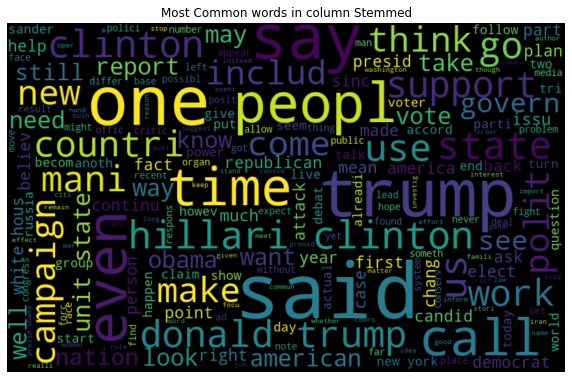

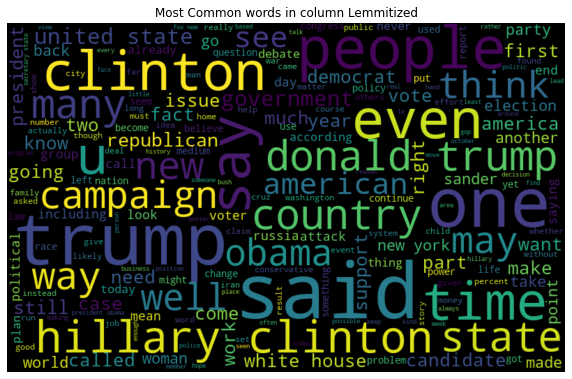

In [22]:
# Importing dependencies
import matplotlib.pyplot as plt

# For Stemmed words
all_words = ' '.join([text for text in df_Refine_data['Stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Stemmed")
plt.show()

#For Lemmitized Words

all_words = ' '.join([text for text in df_Refine_data['lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Lemmitized")
plt.show()

B -Most common words in RAEL news

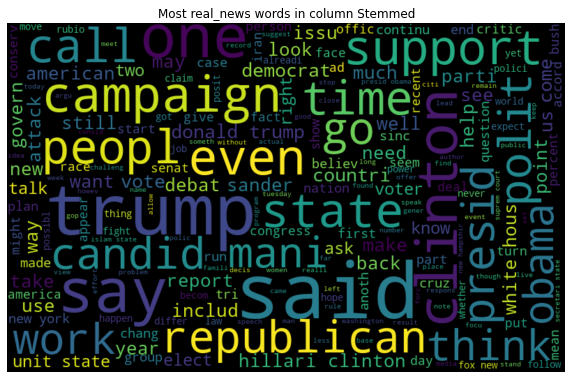

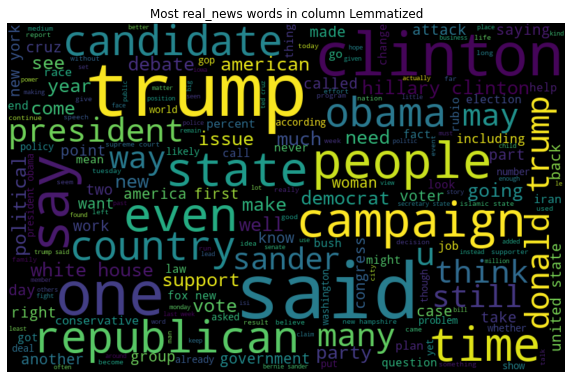

In [23]:
real_news =' '.join([text for text in df_Refine_data['Stemmed'][df_Refine_data['label'] == 'REAL']])

# For Stemmed Tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(real_news)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most real_news words in column Stemmed")
plt.show()

real_news =' '.join([text for text in df_Refine_data['lemmatized'][df_Refine_data['label'] == 'REAL']])

# For Lemmatized Tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(real_news)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most real_news words in column Lemmatized")
plt.show()

B -Most common words in FAKE news

In [ ]:
fake_news =' '.join([text for text in df_Refine_data['Stemmed'][df_Refine_data['label'] == 'FAKE']])

# For Stemmed Tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(real_news)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most fake_news words in column Stemmed")
plt.show()

fake_news =' '.join([text for text in df_Refine_data['lemmatized'][df_Refine_data['label'] == 'FAKE']])

# For Lemmatized Tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(real_news)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most fake_news words in column Lemmatized")
plt.show()

# Features Extraction

A - Bag of Words Feature matrix - For columns 'Stemmed' and 'lemmatized'

In [ ]:
# Creating Bag of words
from sklearn.feature_extraction.text import CountVectorizer
bag_of_words = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bag_of_words

In [ ]:
bag_of_words_stemmed = bag_of_words.fit_transform(df_Refine_data['Stemmed'])
bag_of_words_lemmatized = bag_of_words.fit_transform(df_Refine_data['lemmatized'])

B - TF-IDF Features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [ ]:
TF_IDF_stemmed = TfidfVectorizer.fit_transform(df_Refine_data['Stemmed'])
TF_IDF_lemmatized = TfidfVectorizer.fit_transform(df_Refine_data['lemmatized'])

# MODELLING

Logistic Regression

In [ ]:
# Importing Dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
df_Refine_data['label'].value_counts()
df_Refine_data["label"] = df_Refine_data["label"].astype('category')
df_Refine_data["label"] = df_Refine_data["label"].cat.codes

In [ ]:
bag_of_words_stemmed

A.2 - For columns stemmed

In [ ]:
# Splitting the data set to train (with labels) and test (without label)
x_features = bag_of_words_stemmed
y_labels = df_Refine_data['label']

# splitting data into training and validation set
xtrain, xtest, ytrain, ytest = train_test_split(x_features, y_labels,  test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain, ytrain) # training the model

prediction = lreg.predict_proba(xtest) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

A1 = f1_score(ytest, prediction_int) # calculating f1 score
print(A1)

A.2 - For columns lemmatized

In [ ]:
# Splitting the data set to train (with labels) and test (without label)
x_features = bag_of_words_lemmatized
y_labels = df_Refine_data['label']

# splitting data into training and validation set
xtrain, xtest, ytrain, ytest = train_test_split(x_features, y_labels,  test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain, ytrain) # training the model

prediction = lreg.predict_proba(xtest) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

A2 = f1_score(ytest, prediction_int) # calculating f1 score
print(A2)

B - Building model using TF-IDF features

B.1 - For columns Stemmed

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(TF_IDF_stemmed, df_Refine_data['label'], test_size=0.2, random_state=7)

lreg.fit(x_train, y_train)

prediction = lreg.predict_proba(x_test)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

B1 = f1_score(y_test, prediction_int) # calculating f1 score
print(B1)




B.2 - For columns Lemmatized

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(TF_IDF_lemmatized, df_Refine_data['label'], test_size=0.2, random_state=7)

lreg.fit(x_train, y_train)

prediction = lreg.predict_proba(x_test)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

B2 = f1_score(y_test, prediction_int) # calculating f1 score
print(B2)




C - PassiveAggressiveClassifier

C-1 - For columns Stemmed

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pass_agg_classifier = PassiveAggressiveClassifier()
from sklearn.metrics import accuracy_score, confusion_matrix

x_train,x_test,y_train,y_test=train_test_split(TF_IDF_stemmed, df_Refine_data['label'], test_size=0.2, random_state=7)
#DataFlair - Fit and transform train set, transform test set

pass_agg_classifier.fit(x_train,y_train)

y_pred=pass_agg_classifier.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

C-2 - For columns Lemmatised

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(TF_IDF_stemmed, df_Refine_data['label'], test_size=0.2, random_state=7)
#DataFlair - Fit and transform train set, transform test set

pass_agg_classifier.fit(x_train,y_train)

y_pred=pass_agg_classifier.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
C2 = f1_score(y_test, y_pred) # calculating f1 score
print(C2)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(TF_IDF_lemmatized, df_Refine_data['label'], test_size=0.2, random_state=7)
#DataFlair - Fit and transform train set, transform test set

pass_agg_classifier.fit(x_train,y_train)

y_pred=pass_agg_classifier.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
C1 = f1_score(y_test, y_pred) # calculating f1 score
print(C1)

In [ ]:
print("F1 - Score Chart")
print("* F1-Score - Model using Bag-of-Words features")
print("   F1-Score = ",A1," - For column stemmed")
print("   F1-Score = ",A2," - For column Lemmatized")
print("* F1-Score - Model using TF-IDF features")
print("   F1-Score = ",B1," - For column stemmed")
print("   F1-Score = ",B2," - For column Lemmatized")
print("* F1-Score - Model using TF-IDF features and PassiveAggressiveClassifier")
print("   F1-Score = ",C1," - For column stemmed")
print("   F1-Score = ",C2," - For column Lemmatized")